We will import the important python libraries required for this algorithm

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Import the dataset from the python library sci-kit-learn.

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

we can take any following data sets available in sklearn


load_boston([return_X_y])	Load and return the boston house-prices dataset (regression).
load_iris([return_X_y])	Load and return the iris dataset (classification).
load_diabetes([return_X_y])	Load and return the diabetes dataset (regression).
load_digits([n_class, return_X_y])	Load and return the digits dataset (classification).
load_linnerud([return_X_y])	Load and return the linnerud dataset (multivariate regression).
load_wine([return_X_y])	Load and return the wine dataset (classification).
load_breast_cancer([return_X_y])	Load and return the breast cancer wisconsin dataset (classification).


In [7]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The datset is in a form of a dictionary.So we will check what all key values are there in dataset.

In [16]:
df=pd.DataFrame(cancer["data"],columns=cancer["feature_names"])

In [17]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we know it is difficult to visualize the data with so many features i.e high dimensional data so we can use PCA to find the two principal components hence visualize the data in two-dimensional space with a single scatter plot. But, before that, we need to pre-process the data i.e we need to scale the data such that each feature has unit variance and has not a greater impact than the other one.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().
We can also specify how many components we want to keep when creating the PCA object.
Here,we will specify number of components as 2

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [34]:
scaled_data.shape

(569, 30)

In [35]:
x_pca.shape

(569, 2)

pronciple component 3

Great! We’ve reduced 30 dimensions to just 2! Let’s plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

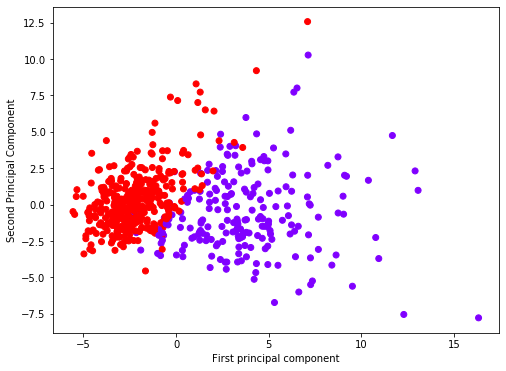

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [38]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Its not easy to understand these component reduction.The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

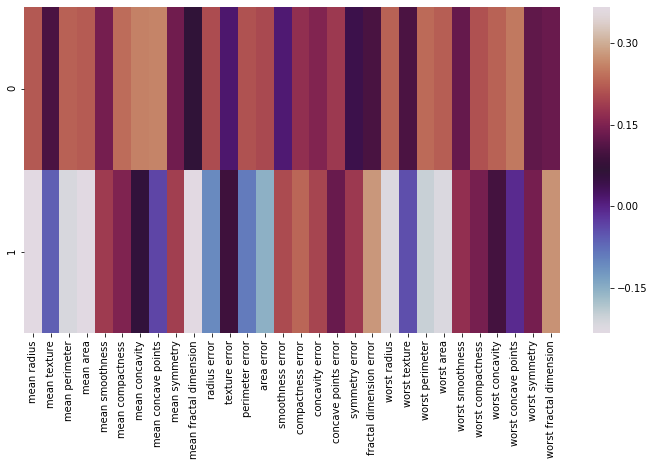

In [39]:
map= pd.DataFrame(pca.components_,columns=cancer['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

Now do it on wine datasets

In [50]:
from sklearn.datasets import load_wine
wines = load_wine()

In [51]:
wines.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [53]:
wines["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [54]:
wines["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
df1=pd.DataFrame(wines["data"],columns=wines["feature_names"])

In [56]:
df1.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_data=scaler.transform(df1)

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [59]:
scaled_data.shape

(178, 13)

In [60]:
x_pca.shape

(178, 2)

Text(0, 0.5, 'Second Principal Component')

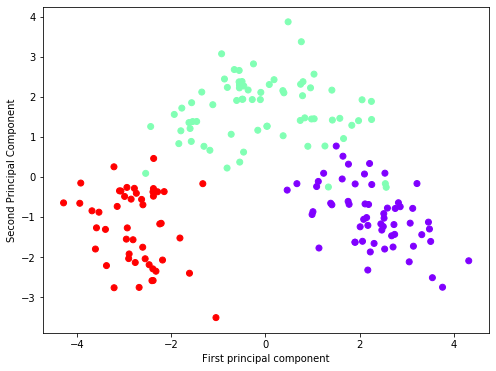

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=wines['target'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

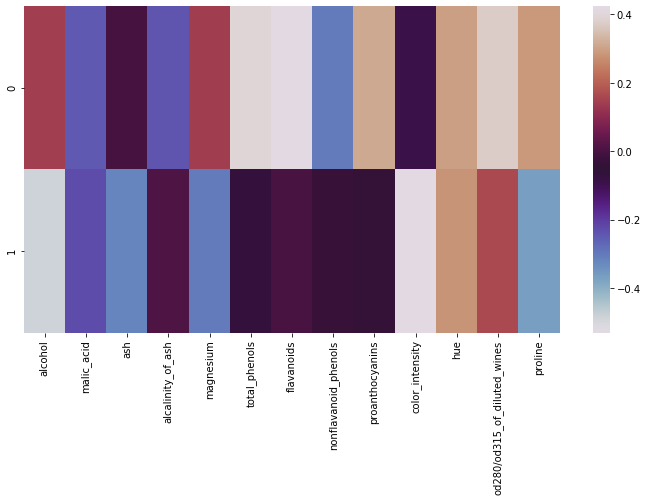

In [62]:
map= pd.DataFrame(pca.components_,columns=wines['feature_names'])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')